In [39]:
# import modules
import pandas as pd
pd.options.display.max_colwidth=500
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import typing
nltk.download('stopwords')
nltk.download('wordnet')
import re
#Visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
#packages to build our knn model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Karim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
     # Enter your own credentials obtained
        # from your developer account
        consumer_key = "AKJRvPwuZS686p1dxkTx3WDnV"
        consumer_secret = "MZ2dakCiJtGBzBkpfTVMFHIlPlwJjYV1bOZg5RN0qIRKxi8d6i"
        access_key = "1498368813867413505-CosP8pC5BUHY9W730ZbjcNhaA9Gk0m"
        access_secret = "eBAL5p7c4DYZVGsIPpRYHQObsAt1HEBsomcGYjUEAwT47"
 

In [41]:
alltweets = []
# Defining the function to get the tweets
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    totaltweets = [[tweet.created_at,tweet._json["user"]["name"],tweet.user.description,tweet.user.statuses_count,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.lang,tweet.user.friends_count,tweet.user.followers_count,tweet.retweet_count,tweet.retweeted,tweet.text,
                  tweet._json["user"]["location"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","name","totaltweets","description","hashtags","user_mentions","favorite_count",
                                    "lang","following","followers_count","retweet_count","retweeted",
                                    "text","location"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in totaltweets])
    tweets_df["name"] = pd.Series([str(i[1]) for i in totaltweets])
    tweets_df["description"] = pd.Series([str(i[2]) for i in totaltweets])
    tweets_df["totaltweets"] = pd.Series([str(i[3]) for i in totaltweets])            
    tweets_df["hashtags"] = pd.Series([str(i[4]) for i in totaltweets])
    tweets_df["user_mentions"] = pd.Series([str(i[5]) for i in totaltweets])
    tweets_df["favorite_count"] = pd.Series([str(i[6]) for i in totaltweets])
    tweets_df["lang"] = pd.Series([str(i[7]) for i in totaltweets])
    tweets_df["following"] = pd.Series([str(i[8]) for i in totaltweets])
    tweets_df["followers_count"] = pd.Series([str(i[9]) for i in totaltweets])
    tweets_df["retweet_count"] = pd.Series([str(i[10]) for i in totaltweets])
    tweets_df["retweeted"] = pd.Series([str(i[11]) for i in totaltweets])
    tweets_df["text"] = pd.Series([str(i[12]) for i in totaltweets])
    tweets_df["location"] = pd.Series([str(i[13]) for i in totaltweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [42]:
sophietweets = get_all_tweets("@sophie_shevchuk")

...400 tweets downloaded so far
...600 tweets downloaded so far
...799 tweets downloaded so far
...998 tweets downloaded so far
...1198 tweets downloaded so far
...1397 tweets downloaded so far
...1597 tweets downloaded so far
...1797 tweets downloaded so far
...1996 tweets downloaded so far
...2195 tweets downloaded so far
...2393 tweets downloaded so far
...2592 tweets downloaded so far
...2790 tweets downloaded so far
...2988 tweets downloaded so far
...3187 tweets downloaded so far
...3237 tweets downloaded so far
...3237 tweets downloaded so far


In [43]:
#overview of oleksa tweets
sophietweets.head()

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
0,2022-05-01 18:14:37+00:00,Sofiia Shevchuk 💙💛,5119,"🇺🇦 Independent Researcher, Project Manager | Climate, Gender, Security | @bxlbinder @wiisbrussels | fmr @HNeumannMEP @SHE_curity @collegeofeurope | my views",[],"[{'screen_name': 'PromoteUkraine', 'name': 'Promote Ukraine', 'id': 3995036555, 'id_str': '3995036555', 'indices': [3, 18]}]",0,en,1777,1748,12,False,RT @PromoteUkraine: Join us for the march and concert on the 8th of May in Brussels https://t.co/4RAVwoazKe,"Brussels, Belgium"
1,2022-05-01 18:12:33+00:00,Sofiia Shevchuk 💙💛,5119,"🇺🇦 Independent Researcher, Project Manager | Climate, Gender, Security | @bxlbinder @wiisbrussels | fmr @HNeumannMEP @SHE_curity @collegeofeurope | my views",[],"[{'screen_name': 'olgatokariuk', 'name': 'Olga Tokariuk', 'id': 1359532099, 'id_str': '1359532099', 'indices': [3, 16]}]",0,en,1777,1748,784,False,"RT @olgatokariuk: About 100 civilians were evacuated from Azovstal steel mill in Mariupol today, president Zelensky confirmed. He said peop…","Brussels, Belgium"
2,2022-04-29 11:48:56+00:00,Sofiia Shevchuk 💙💛,5119,"🇺🇦 Independent Researcher, Project Manager | Climate, Gender, Security | @bxlbinder @wiisbrussels | fmr @HNeumannMEP @SHE_curity @collegeofeurope | my views",[],"[{'screen_name': 'WIIS_NL', 'name': 'WIIS Netherlands', 'id': 1252876679459991554, 'id_str': '1252876679459991554', 'indices': [3, 11]}]",0,en,1777,1748,5,False,"RT @WIIS_NL: This week, 3 years ago, UNSC adopted Resolution 2467 - Women and peace &amp; security: Sexual violence in conflict\n\nAcknowledging…","Brussels, Belgium"
3,2022-04-29 06:51:35+00:00,Sofiia Shevchuk 💙💛,5119,"🇺🇦 Independent Researcher, Project Manager | Climate, Gender, Security | @bxlbinder @wiisbrussels | fmr @HNeumannMEP @SHE_curity @collegeofeurope | my views","[{'text': 'RussianWarCrimes', 'indices': [20, 37]}]","[{'screen_name': 'PromoteUkraine', 'name': 'Promote Ukraine', 'id': 3995036555, 'id_str': '3995036555', 'indices': [3, 18]}]",0,und,1777,1748,5,False,RT @PromoteUkraine: #RussianWarCrimes https://t.co/EjIAG1FpJR,"Brussels, Belgium"
4,2022-04-29 05:01:26+00:00,Sofiia Shevchuk 💙💛,5119,"🇺🇦 Independent Researcher, Project Manager | Climate, Gender, Security | @bxlbinder @wiisbrussels | fmr @HNeumannMEP @SHE_curity @collegeofeurope | my views",[],"[{'screen_name': 'yarotrof', 'name': 'Yaroslav Trofimov', 'id': 30011100, 'id_str': '30011100', 'indices': [3, 12]}]",0,en,1777,1748,2276,False,RT @yarotrof: It’s not just Putin. Canceling Ukraine is a desire shared by many Russians throughout the years — including some of the count…,"Brussels, Belgium"


In [44]:
sophietweets.describe(exclude='number')

,time,name,totaltweets,description,hashtags,user_mentions,favorite_count,lang,following,followers_count,retweet_count,retweeted,text,location
count,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237,3237
unique,3235,1,1,1,1309,1829,55,17,1,1,509,1,3224,1
top,2019-07-08 15:45:28+00:00,Sofiia Shevchuk 💙💛,5119,"🇺🇦 Independent Researcher, Project Manager | Climate, Gender, Security | @bxlbinder @wiisbrussels | fmr @HNeumannMEP @SHE_curity @collegeofeurope | my views",[],[],0,en,1777,1748,0,False,RT @SIPRIorg: 11 countries discussed by the @UN #Peacebuilding Commission in the past 2 years are in areas highly exposed to #ClimateChange…,"Brussels, Belgium"
freq,2,3237,3237,3237,1881,342,2725,3071,3237,3237,435,3237,7,3237


In [45]:
sophietweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3237 entries, 0 to 3236
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   time             3237 non-null   object
 1   name             3237 non-null   object
 2   totaltweets      3237 non-null   object
 3   description      3237 non-null   object
 4   hashtags         3237 non-null   object
 5   user_mentions    3237 non-null   object
 6   favorite_count   3237 non-null   object
 7   lang             3237 non-null   object
 8   following        3237 non-null   object
 9   followers_count  3237 non-null   object
 10  retweet_count    3237 non-null   object
 11  retweeted        3237 non-null   object
 12  text             3237 non-null   object
 13  location         3237 non-null   object
dtypes: object(14)
memory usage: 354.2+ KB


In [46]:
#measuring hashtahs
sophietweets['hashtags'].value_counts().loc[lambda x : x>1].to_frame()

,hashtags
[],1881
"[{'text': 'Peacebuilding', 'indices': [48, 62]}, {'text': 'ClimateChange', 'indices': [125, 139]}]",7
"[{'text': 'ClimateChange', 'indices': [55, 69]}, {'text': 'women', 'indices': [79, 85]}, {'text': 'peace', 'indices': [87, 93]}, {'text': 'security', 'indices': [98, 107]}]",3
"[{'text': 'Ukraine', 'indices': [24, 32]}]",3
"[{'text': 'Women', 'indices': [21, 27]}, {'text': 'Peace', 'indices': [29, 35]}, {'text': 'Security', 'indices': [40, 49]}, {'text': 'ClimateChange', 'indices': [85, 99]}]",3
"[{'text': 'Ukraine', 'indices': [33, 41]}]",3
"[{'text': 'Ukraine', 'indices': [73, 81]}]",3
"[{'text': 'Ukraine', 'indices': [14, 22]}]",3
"[{'text': 'Ukraine', 'indices': [89, 97]}]",2
"[{'text': 'NATO', 'indices': [15, 20]}]",2


In [47]:
#display the most user mentions
sophietweets['user_mentions'].value_counts().loc[lambda x : x>20].to_frame()

,user_mentions
[],342
"[{'screen_name': 'bxlbinder', 'name': 'The Brussels Binder 😷', 'id': 749916668483207172, 'id_str': '749916668483207172', 'indices': [3, 13]}]",75
"[{'screen_name': 'SIPRIorg', 'name': 'SIPRI', 'id': 263083479, 'id_str': '263083479', 'indices': [3, 12]}]",41
"[{'screen_name': 'HNeumannMEP', 'name': 'Hannah Neumann', 'id': 828566340365643776, 'id_str': '828566340365643776', 'indices': [3, 15]}]",31
"[{'screen_name': 'KyivIndependent', 'name': 'The Kyiv Independent', 'id': 1462548977367359490, 'id_str': '1462548977367359490', 'indices': [3, 19]}]",28
"[{'screen_name': 'UN_Women', 'name': 'UN Women', 'id': 17137628, 'id_str': '17137628', 'indices': [3, 12]}]",27
"[{'screen_name': 'PromoteUkraine', 'name': 'Promote Ukraine', 'id': 3995036555, 'id_str': '3995036555', 'indices': [3, 18]}]",27
"[{'screen_name': 'DanielFiott', 'name': 'Daniel Fiott', 'id': 1309747447, 'id_str': '1309747447', 'indices': [3, 15]}]",26
"[{'screen_name': 'Carnegie_Europe', 'name': 'Carnegie Europe', 'id': 20770862, 'id_str': '20770862', 'indices': [3, 19]}]",24
"[{'screen_name': 'feministfp', 'name': 'Centre for Feminist Foreign Policy', 'id': 773245584358666241, 'id_str': '773245584358666241', 'indices': [3, 14]}]",23


In [77]:
#which tweet got the most likes
print(sophietweets ['favorite_count'].max())
sophietweets.loc[sophietweets ['favorite_count'] == sophietweets ['favorite_count'].max()]['text']

107


1440    New Year, New Beginnings ✨\n\nI am excited and honoured to share that as of today I have joined the team of MEP Dr… https://t.co/g9m3IAd8ag
Name: text, dtype: object

In [76]:
#which tweet got the most retweets
print(sophietweets ['retweet_count'].max())
sophietweets.loc[sophietweets ['retweet_count'] == sophietweets ['retweet_count'].max()]['text']

530530


2095    RT @Levance_: Know the difference. https://t.co/einoHMXvHn
Name: text, dtype: object

In [50]:
sid_analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text:str, analyser,desired_type:str='pos'):
    # Get sentiment from text
    sentiment_score = analyser.polarity_scores(text)
    return sentiment_score[desired_type]

# Get Sentiment scores
def get_sentiment_scores(df,data_column):
    df[f'{data_column} Positive Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'pos'))
    df[f'{data_column} Negative Sentiment Score'] = df[data_column].astype(str).apply(lambda x: get_sentiment(x,sid_analyzer,'neg'))
    return df
#find all top scoring tweets
def print_top_n_tweets(df,data_column,number_of_rows):
    for index,row in df.nlargest(number_of_rows,data_column).iterrows():
        print(f"Score: {row[data_column]}, Tweet: {row[0]}")

In [51]:
sophietweets  = get_sentiment_scores(sophietweets ,'text')
tweet_sentiment = sophietweets [['text','text Positive Sentiment Score','text Negative Sentiment Score']]

In [52]:
tweet_sentiment.head()

,text,text Positive Sentiment Score,text Negative Sentiment Score
0,RT @PromoteUkraine: Join us for the march and concert on the 8th of May in Brussels https://t.co/4RAVwoazKe,0.121,0.000
1,"RT @olgatokariuk: About 100 civilians were evacuated from Azovstal steel mill in Mariupol today, president Zelensky confirmed. He said peop…",0.000,0.000
2,"RT @WIIS_NL: This week, 3 years ago, UNSC adopted Resolution 2467 - Women and peace &amp; security: Sexual violence in conflict\n\nAcknowledging…",0.208,0.226
3,RT @PromoteUkraine: #RussianWarCrimes https://t.co/EjIAG1FpJR,0.000,0.000
4,RT @yarotrof: It’s not just Putin. Canceling Ukraine is a desire shared by many Russians throughout the years — including some of the count…,0.203,0.000


In [53]:
#Top positive tweets
print_top_n_tweets(tweet_sentiment,'text Positive Sentiment Score',10)

Score: 0.861, Tweet: @fedefaziof Good luck!
Score: 0.861, Tweet: @elischelin Good luck!
Score: 0.756, Tweet: @elischelin @cfelund Good luck!
Score: 0.75, Tweet: @miru_brs Thanks for sharing!
Score: 0.743, Tweet: @d_onyshko Yes! Like our friends from @EAD_Diplomats :)
Score: 0.73, Tweet: Interesting 🤔 https://t.co/rJPYlklnZn
Score: 0.714, Tweet: @arnocast Agree 🥰
Score: 0.714, Tweet: @cdotcampbell Good luck! It will be amazing 😉
Score: 0.712, Tweet: @sjasmith Beautiful name - Merry Christmas 🎄
Score: 0.692, Tweet: Love it! 😄 https://t.co/eFxqNoePjb


In [54]:
#Top negative tweets
print_top_n_tweets(tweet_sentiment,'text Negative Sentiment Score',10)

Score: 0.511, Tweet: RT @HNeumannMEP: Climate change affects us all, but the world's poorest are hit worst. Floods, droughts, crop failures etc. threaten their…
Score: 0.485, Tweet: RT @HNeumannMEP: With @PGAction, we denounce persecution, prosecution, sexism, harassment + all other forms of discrimination &amp; violence ag…
Score: 0.455, Tweet: RT @unwomenEU: Each day, #LGBTIQ+ people are battling intersecting forms of discrimination, racism, violence and exclusion around the world…
Score: 0.452, Tweet: RT @KSergatskova: There is a humanitarian catastrophe in #Mariupol. No food, no water, no electricity, no heat. People collect water from p…
Score: 0.434, Tweet: RT @Ukraine: Hard to find words... The killing of civilians in Bucha by Russian war criminals is appalling beyond any measure.

Help us sto…
Score: 0.434, Tweet: RT @coe_civ: Failure to address climate-related security risks can make conflict dynamics worse, argues @JanVivekananda in her #OpEd for th…
Score: 0.418, Tweet: RT @

In [55]:
sophietweets ['retweet_count']= sophietweets ['retweet_count'].astype('int64')
sophietweets ['favorite_count']= sophietweets ['favorite_count'].astype('int64')

In [56]:
features= sophietweets[['retweet_count','favorite_count','text Positive Sentiment Score','text Negative Sentiment Score']]
features.corr()

,retweet_count,favorite_count,text Positive Sentiment Score,text Negative Sentiment Score
retweet_count,1.000000,-0.019539,-0.027410,0.009221
favorite_count,-0.019539,1.000000,0.060406,-0.028249
text Positive Sentiment Score,-0.027410,0.060406,1.000000,-0.170113
text Negative Sentiment Score,0.009221,-0.028249,-0.170113,1.000000


<AxesSubplot:>

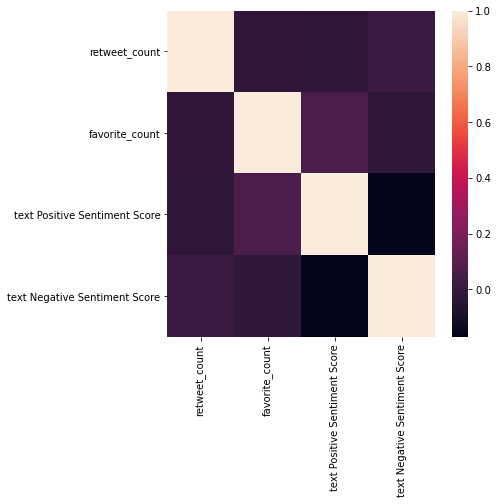

In [57]:
#correlation map
plt.figure(figsize= (6, 6))
sns.heatmap(features.corr())

In [58]:
 #Import english stop words

stopcorpus: typing.List = stopwords.words('english')

In [59]:
# Convert to lowercase, and remove stop words

def remove_links(text):
    # Remove any hyperlinks that may be in the text starting with http
    return re.sub(r"http\S+", "", text)

def style_text(text:str):
    # Convert to lowercase
    return text.lower()

def remove_words(text_data:str,list_of_words_to_remove: typing.List):
    # Remove all words as specified in a custom list of words
    return [item for item in text_data if item not in list_of_words_to_remove]

def collapse_list_to_string(string_list):
    # This is to join back together the text data into a single string
    return ' '.join(string_list)

def remove_apostrophes(text):
    # Remove any apostrophes as these are irrelavent in our word cloud
    text = text.replace("'", "")
    text = text.replace('"', "")
    text = text.replace('`', "")
    return text

def remove_others(text):
    
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Remove @mentions
    text = re.sub(r'#','',text) # Remove hashtag symbols
    text = re.sub(r'RT[\s]+','',text) # Remove retweets
    text = re.sub(r'Ukraine','',text) 
    text = re.sub(r'ukraine','',text) 
    text = re.sub(r'ukrainian','',text)
    text = re.sub(r'amp','',text)
    text = re.sub(r'rt','',text)
    text = re.sub(r'Russia','',text) 
    text = re.sub(r'russia','',text) 
    return text

In [60]:
tweet_sentiment['cleaned_text'] = tweet_sentiment.loc[:,'text'].astype(str).apply(remove_links)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(style_text)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].astype(str).apply(lambda x: remove_words(x.split(),stopcorpus))

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(collapse_list_to_string)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_apostrophes)

tweet_sentiment['cleaned_text'] = tweet_sentiment['cleaned_text'].apply(remove_others)

<ipython-input-60-2ade89cc017e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-2ade89cc017e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-2ade89cc017e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-60-2ade89c

In [61]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


tweet_sentiment['clean_lemmatized'] = tweet_sentiment['cleaned_text'].astype(str).apply(lemmatize_text)

tweet_sentiment['clean_lemmatized'] = tweet_sentiment['clean_lemmatized'].apply(collapse_list_to_string)

display(tweet_sentiment['clean_lemmatized'].head(5))

<ipython-input-61-3e2f8e3d0251>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-61-3e2f8e3d0251>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0                                                                                     : join u march conce 8th may brussels
1                     : 100 civilian evacuated azovstal steel mill mariupol today, president zelensky confirmed. said peop…
2    _nl: week, 3 year ago, unsc adopted resolution 2467 - woman peace &; security: sexual violence conflict acknowledging…
3                                                                                                              : nwarcrimes
4                                           : it’s putin. canceling desire shared many n throughout year — including count…
Name: clean_lemmatized, dtype: object

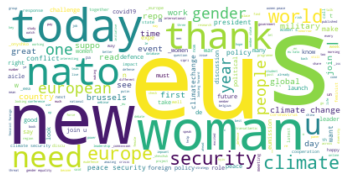

In [62]:
def plot_wordcloud(series,output_filename='wordcloud'):

    wordcloud = WordCloud(max_font_size=150, max_words=500, background_color="white").generate(' '.join(series.astype(str)))

    wordcloud.to_file(output_filename + '.png')

    plt.imshow(wordcloud, interpolation='bilinear')

    plt.axis("off")

plot_wordcloud(tweet_sentiment['clean_lemmatized'],'overall-wordcloud')

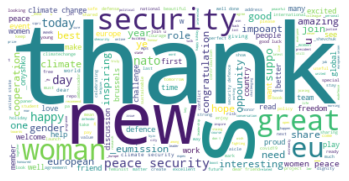

In [63]:
def plot_wordcloud_top_n(df,number_of_tweets,score_column,data_column,output_filename):
    sliced_df = df.nlargest(number_of_tweets,score_column)

    plot_wordcloud(sliced_df[data_column],output_filename)


plot_wordcloud_top_n(tweet_sentiment,500,'text Positive Sentiment Score','clean_lemmatized','positive-wordcloud')

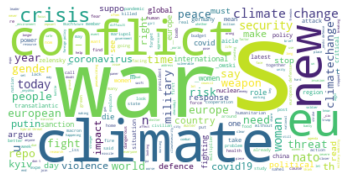

In [64]:
plot_wordcloud_top_n(tweet_sentiment,500,'text Negative Sentiment Score','clean_lemmatized','negative-wordcloud')

In [65]:
#retweets distribution over time
fig = px.line(sophietweets, x="time", y= sophietweets['retweet_count'])
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y",
    ticklabelmode="period")
fig.show()

In [66]:
df=sophietweets [['time', 'retweet_count','text Positive Sentiment Score','text Negative Sentiment Score']]
pos=sophietweets [['time', 'retweet_count','text Positive Sentiment Score']]
neg =sophietweets [['time', 'retweet_count','text Negative Sentiment Score']]
df[(df['time']>='2022-03-01') & (df['time']<='2022-04-01')]

,time,retweet_count,text Positive Sentiment Score,text Negative Sentiment Score
96,2022-03-31 11:21:14+00:00,9,0.187,0.050
97,2022-03-30 10:09:29+00:00,29,0.257,0.000
98,2022-03-28 18:54:31+00:00,21,0.117,0.092
99,2022-03-28 07:48:46+00:00,9,0.148,0.000
100,2022-03-27 17:16:12+00:00,2,0.383,0.000
...,...,...,...,...
252,2022-03-01 11:16:33+00:00,11,0.185,0.000
253,2022-03-01 11:01:28+00:00,14,0.121,0.000
254,2022-03-01 10:24:16+00:00,2,0.105,0.236
255,2022-03-01 09:38:21+00:00,1792,0.000,0.333


In [67]:
#how retweets via sentiments are having an evolution over time
fig = go.Figure()
for col in pos.columns:
    fig.add_trace(go.Scatter(x=pos['time'], y=pos['text Positive Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='green'
                             )
                 )
for col in neg.columns:
    fig.add_trace(go.Scatter(x=neg['time'], y=neg['text Negative Sentiment Score'],
                             name = col,
                             mode = 'markers+lines',
                             line=dict(shape='linear'),
                             connectgaps=True,
                             line_color='red'
                             )
                 )
fig.show()

In [68]:

sophietweets["is_viral"] = sophietweets.retweet_count.apply(
    lambda row: 1 if row >= sophietweets.retweet_count.mean()  else 0)

print(sophietweets.is_viral.value_counts())

0    3026
1     211
Name: is_viral, dtype: int64


In [69]:
sophietweets['tweet_length'] = sophietweets.apply(lambda tweet: len(tweet['text']), axis=1)
sophietweets["followers_count"] = sophietweets.apply(lambda tweet: tweet["followers_count"], axis=1)
sophietweets["friends_count"] = sophietweets.apply(lambda tweet: tweet["following"], axis=1)

sophietweets["hashtag_count"] = sophietweets.apply(lambda tweet: tweet.text.count("#"), axis=1)
sophietweets["link_count"] = sophietweets.apply(lambda tweet: tweet.text.count("http"), axis=1)
sophietweets["word_count"] = sophietweets.apply(lambda tweet: len(tweet.text.split()), axis=1)

def find_avg_word_length(str):
    #function to find average word length of a string
    sum = 0
    for i in range(0, len(str.split())):
        sum = sum + len(str.split()[i])
    avg = sum/len(str.split())
    return avg

sophietweets["avg_length_of_words"] = sophietweets.text.apply(find_avg_word_length)

In [70]:


labels = sophietweets[["is_viral"]]
features = sophietweets[["tweet_length", "followers_count", "friends_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features = scale(features, axis=0)

features2 = sophietweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count"]]
scaled_features2 = scale(features2, axis=0)

features3 = sophietweets[["tweet_length", "followers_count", "friends_count", "hashtag_count", "link_count", "word_count", "favorite_count",'text Positive Sentiment Score','text Negative Sentiment Score']]
scaled_features3 = scale(features3, axis=0)

print(features.loc[0])
print(scaled_features[0])

tweet_length                       107
followers_count                   1748
friends_count                     1777
text Positive Sentiment Score    0.121
text Negative Sentiment Score      0.0
Name: 0, dtype: object
[-0.95577356  0.          0.          0.00822439 -0.46948938]


In [71]:


train_data, test_data, train_labels, test_labels = train_test_split(scaled_features3, labels, 
                                                                    test_size = 0.2,
                                                                    random_state=1

In [72]:


classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(train_data, train_labels)
classifier.score(test_data, test_labels)


C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.9367283950617284

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

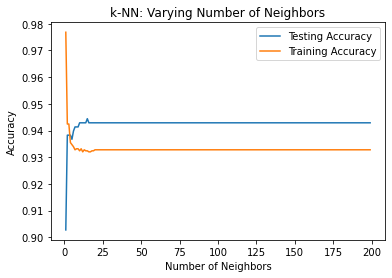

In [73]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 200)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
# Loop over different values of k
for i, k in enumerate(neighbors):
 # Setup a k-NN Classifier with k neighbors: knn
 knn = KNeighborsClassifier(n_neighbors=k)
 # Fit the classifier to the training data
 knn.fit(train_data, train_labels)
 
 #Compute accuracy on the training set
 train_accuracy[i] = knn.score(train_data, train_labels)
 #Compute accuracy on the testing set
 test_accuracy[i] = knn.score(test_data, test_labels)
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [74]:
best_score = 0
best_k = 0

for k in range(1, 200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(train_data, train_labels)
    if classifier.score(test_data, test_labels) > best_score:
        best_score = classifier.score(test_data, test_labels)
        best_k = k

print(best_k)
print(best_score)

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\Karim\anaconda3\lib\sit

15
0.9444444444444444


In [78]:
sophietweets.to_csv('sophietweets')